In [1]:
import torch
import warnings
import numpy as np
import matplotlib.pyplot as plt
import math

warnings.simplefilter(action='ignore', category=UserWarning)


class kernel:
    def __init__(self, K, R, d, J, lamb_max):
        # -- filter properties
        self.R = float(R)
        self.J = J
        self.K = K
        self.d = d
        self.lamb_max = torch.tensor(lamb_max)

        # -- Half-Cosine kernel
        self.a = torch.div(torch.mul(self.R, torch.log(self.lamb_max)), self.J-self.R+1)
        
        self.g_hat = lambda lamb: torch.sum(torch.tensor(self.d)*(torch.cos(2*math.pi*torch.tensor([_ for _ in range(self.K+1)])*(lamb/self.a+0.5)))).unsqueeze(-1).unsqueeze(-1) if 0<=-lamb<self.a else torch.zeros((1,1))

    def wavelet(self, lamb, j):
        """
            constructs wavelets ($j\in [2, J]$).
        :param lamb: eigenvalue (analogue of frequency).
        :param j: filter index in the filter bank.
        :return: filter response to input eigenvalues.
        """
        return self.g_hat(torch.log(lamb) - torch.div(self.a*(j-1), self.R))

    def scaling(self, lamb):
        """
            constructs scaling function (j=1).
        :param lamb: eigenvalue (analogue of frequency).
        :return: filter response to input eigenvalues.
        """
        
        sum_term = self.R/2*torch.sum(torch.tensor(self.d[1:])**2)
        #print(torch.abs(self.wavelet(lamb,1)))
        #print(torch.abs(self.wavelet(lamb,2)))
        #print([torch.abs(self.wavelet(lamb,j).squeeze(1))**2 for j in [1,2]])
        sum_term2 = torch.sum(torch.stack([torch.abs(self.wavelet(lamb,j))**2 for j in range(2,self.J+1)]))
        
        g = torch.sqrt(self.R*self.d[0]**2 + sum_term -  sum_term2)
        return g


# -- define filter-bank
lamb_max = 2
J = 8
filter_bank = kernel(K=1, R=3, d=[0.5, 0.5], J=J, lamb_max=lamb_max)

# -- plot filters
draw1, draw2, draw3, draw4, draw5, draw6, draw7, draw8 = [], [], [], [], [], [], [], []

interval = np.linspace(0,2,1000)
for i in interval:
    draw1.append(filter_bank.scaling(torch.tensor(i)).item())
    draw2.append(filter_bank.wavelet(torch.tensor(i),2))
    draw3.append(filter_bank.wavelet(torch.tensor(i),3))
    draw4.append(filter_bank.wavelet(torch.tensor(i),4))
    draw5.append(filter_bank.wavelet(torch.tensor(i),5))
    draw6.append(filter_bank.wavelet(torch.tensor(i),6))
    draw7.append(filter_bank.wavelet(torch.tensor(i),7))
    draw8.append(filter_bank.wavelet(torch.tensor(i),8))

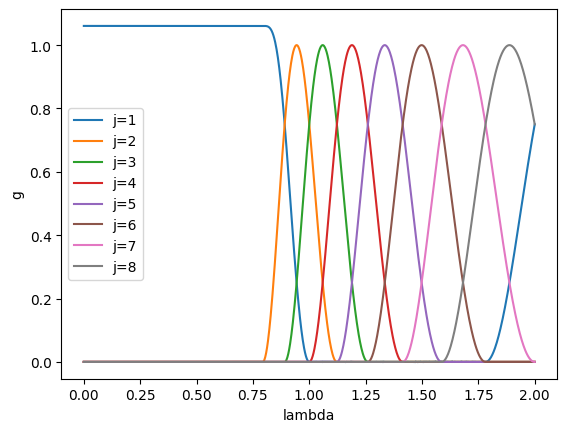

In [6]:
plt.plot(interval, draw1, label="j=1")
plt.plot(interval, draw2, label="j=2")
plt.plot(interval, draw3, label="j=3")
plt.plot(interval, draw4, label="j=4")
plt.plot(interval, draw5, label="j=5")
plt.plot(interval, draw6, label="j=6")
plt.plot(interval, draw7, label="j=7")
plt.plot(interval, draw8, label="j=8")
plt.xlabel("lambda")
plt.ylabel("g")
plt.legend()
plt.show()